# Predicting the Quality of Vinho Verde Wine Based on Physical Properties
## DSCI 100 Project Proposal
Date: October 2022

Group: 157

## Proposal Overview
- Introduction
- Preliminary exploratory data analysis
- Methods
- Expected outcomes and significance

## Introduction

There are many factors that give white wine its distinctive taste. Sweetness is determined by **residual sugars** left over from fermentation, and is measured in grams per decimeter cubed. The sugars that were consumed during fermentation determine the **alcohol content** of the wine – grapes with more sugar create more alcoholic wines. The tart or sour taste of the wine comes from its **acidity**. All wine has a **pH** between 3 and 4, but small variations in acidity can create a big difference in taste. Other properties such as **citric acid**, **sulfur dioxide**, **chlorides**, and **sulfates** also affect the quality of the wine.

In our project, we ask, what physical properties lead to a higher quality white wine? To solve this problem, we will be using data from approximately 5,000 variants of the Portuguese wine “Vinho Verde” collected by Cortez et al. (2009). 

Though all variables provided affect the quality of a wine, we chose a subset of the variables based on which appeared to have an obvious relationship with quality (summarized in the following section) in addition to what was of interest to us. The variables we will be using in our analysis of white wine quality are:
- Fixed acidity (g/dm^3)
- Citric acid (g/dm^3)
- Residual sugar (g/dm^3)
- pH (logarithmic units, from 1-12)
- Acohol (volume percent, from 0 to 100)
- Quality (a score, from 3-9, with 9 being the best quality)

## Preliminary exploratory data analysis

#### (1) Importing relevant libraries

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### (2) Reading in the data from the web

In [2]:
data <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delim = ";")

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### (3) Tidying the data

In [3]:
wine <- mutate(wine, quality = as_factor(quality))
colnames(wine) <- make.names(colnames(wine))
wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6


#### (4) Splitting the data

In [4]:
wine_split <- initial_split(wine, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

#### (5) Summarizing the data in tables

- These data helped us to pick which variables we wanted to use

In [51]:
# Variables available to us
#colnames(wine)

# Get the number of samples and their respective percentage of each quality in the training set
number_of_samples <- group_by(wine_training, quality) |> summarize(n = n())
total_samples <- pull(number_of_samples, n) |> sum()
number_of_samples <- mutate(number_of_samples, percent = round(100 * n / total_samples, digits = 1))
number_of_samples

# See the average value of each variable for each quality of wine
fixed.acidity_column <- group_by(wine_training, quality) |> 
    summarize(fixed.acidity.avg = mean(fixed.acidity))

volatile.acidity_column <- group_by(wine_training, quality) |> 
    summarize(volatile.acidity.avg = mean(volatile.acidity)) |>
    select(-quality)

citric.acid_column <- group_by(wine_training, quality) |> 
    summarize(citric.acid.avg = mean(citric.acid)) |>
    select(-quality)

residual.sugar_column <- group_by(wine_training, quality) |> 
    summarize(residual.sugar.avg = mean(residual.sugar)) |>
    select(-quality)

chlorides_column <- group_by(wine_training, quality) |> 
    summarize(chlorides.avg = mean(chlorides)) |>
    select(-quality)

free.sulfur.dioxide_column <- group_by(wine_training, quality) |> 
    summarize(free.sulfur.dioxide.avg = mean(free.sulfur.dioxide)) |>
    select(-quality)

density_column <- group_by(wine_training, quality) |> 
    summarize(density.avg = mean(density)) |>
    select(-quality)

pH_column <- group_by(wine_training, quality) |> 
    summarize(pH.avg = mean(pH)) |>
    select(-quality)

sulphates_column <- group_by(wine_training, quality) |> 
    summarize(sulphates.avg = mean(sulphates)) |>
    select(-quality)

alcohol_column <- group_by(wine_training, quality) |> 
    summarize(alcohol.avg = mean(alcohol)) |>
    select(-quality)

quality_averages <- bind_cols(fixed.acidity_column, volatile.acidity_column, citric.acid_column,
                              residual.sugar_column, chlorides_column, free.sulfur.dioxide_column, 
                              density_column, pH_column, sulphates_column, alcohol_column)

quality_averages

quality,n,percent
<fct>,<int>,<dbl>
3,18,0.5
4,119,3.2
5,1085,29.5
6,1643,44.7
7,668,18.2
8,135,3.7
9,4,0.1


quality,fixed.acidity.avg,volatile.acidity.avg,citric.acid.avg,residual.sugar.avg,chlorides.avg,free.sulfur.dioxide.avg,density.avg,pH.avg,sulphates.avg,alcohol.avg
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,7.600000,0.3436111,0.3327778,6.436111,0.05666667,52.08333,0.9951350,3.184444,0.4822222,10.23333
4,7.143697,0.3680672,0.3129412,4.769328,0.04886555,23.69748,0.9942378,3.176134,0.4755462,10.18487
5,6.934931,0.3019171,0.3342396,7.262258,0.05049493,36.13825,0.9952099,3.170700,0.4829401,9.82949
6,6.849513,0.2607760,0.3388862,6.465520,0.04551674,35.60225,0.9939872,3.185746,0.4908338,10.56875
7,6.725599,0.2653219,0.3241467,5.221632,0.03826497,33.91916,0.9924858,3.218623,0.5039222,11.35726
8,6.655556,0.2767407,0.3297778,5.848148,0.03844444,38.02963,0.9923308,3.216963,0.4825926,11.59778
9,7.550000,0.2825000,0.3975000,4.100000,0.02975000,27.50000,0.9918750,3.315000,0.4925000,12.05000


#### (6) Visualizing the data
- This graph shows the distribution of all available variables for the training set

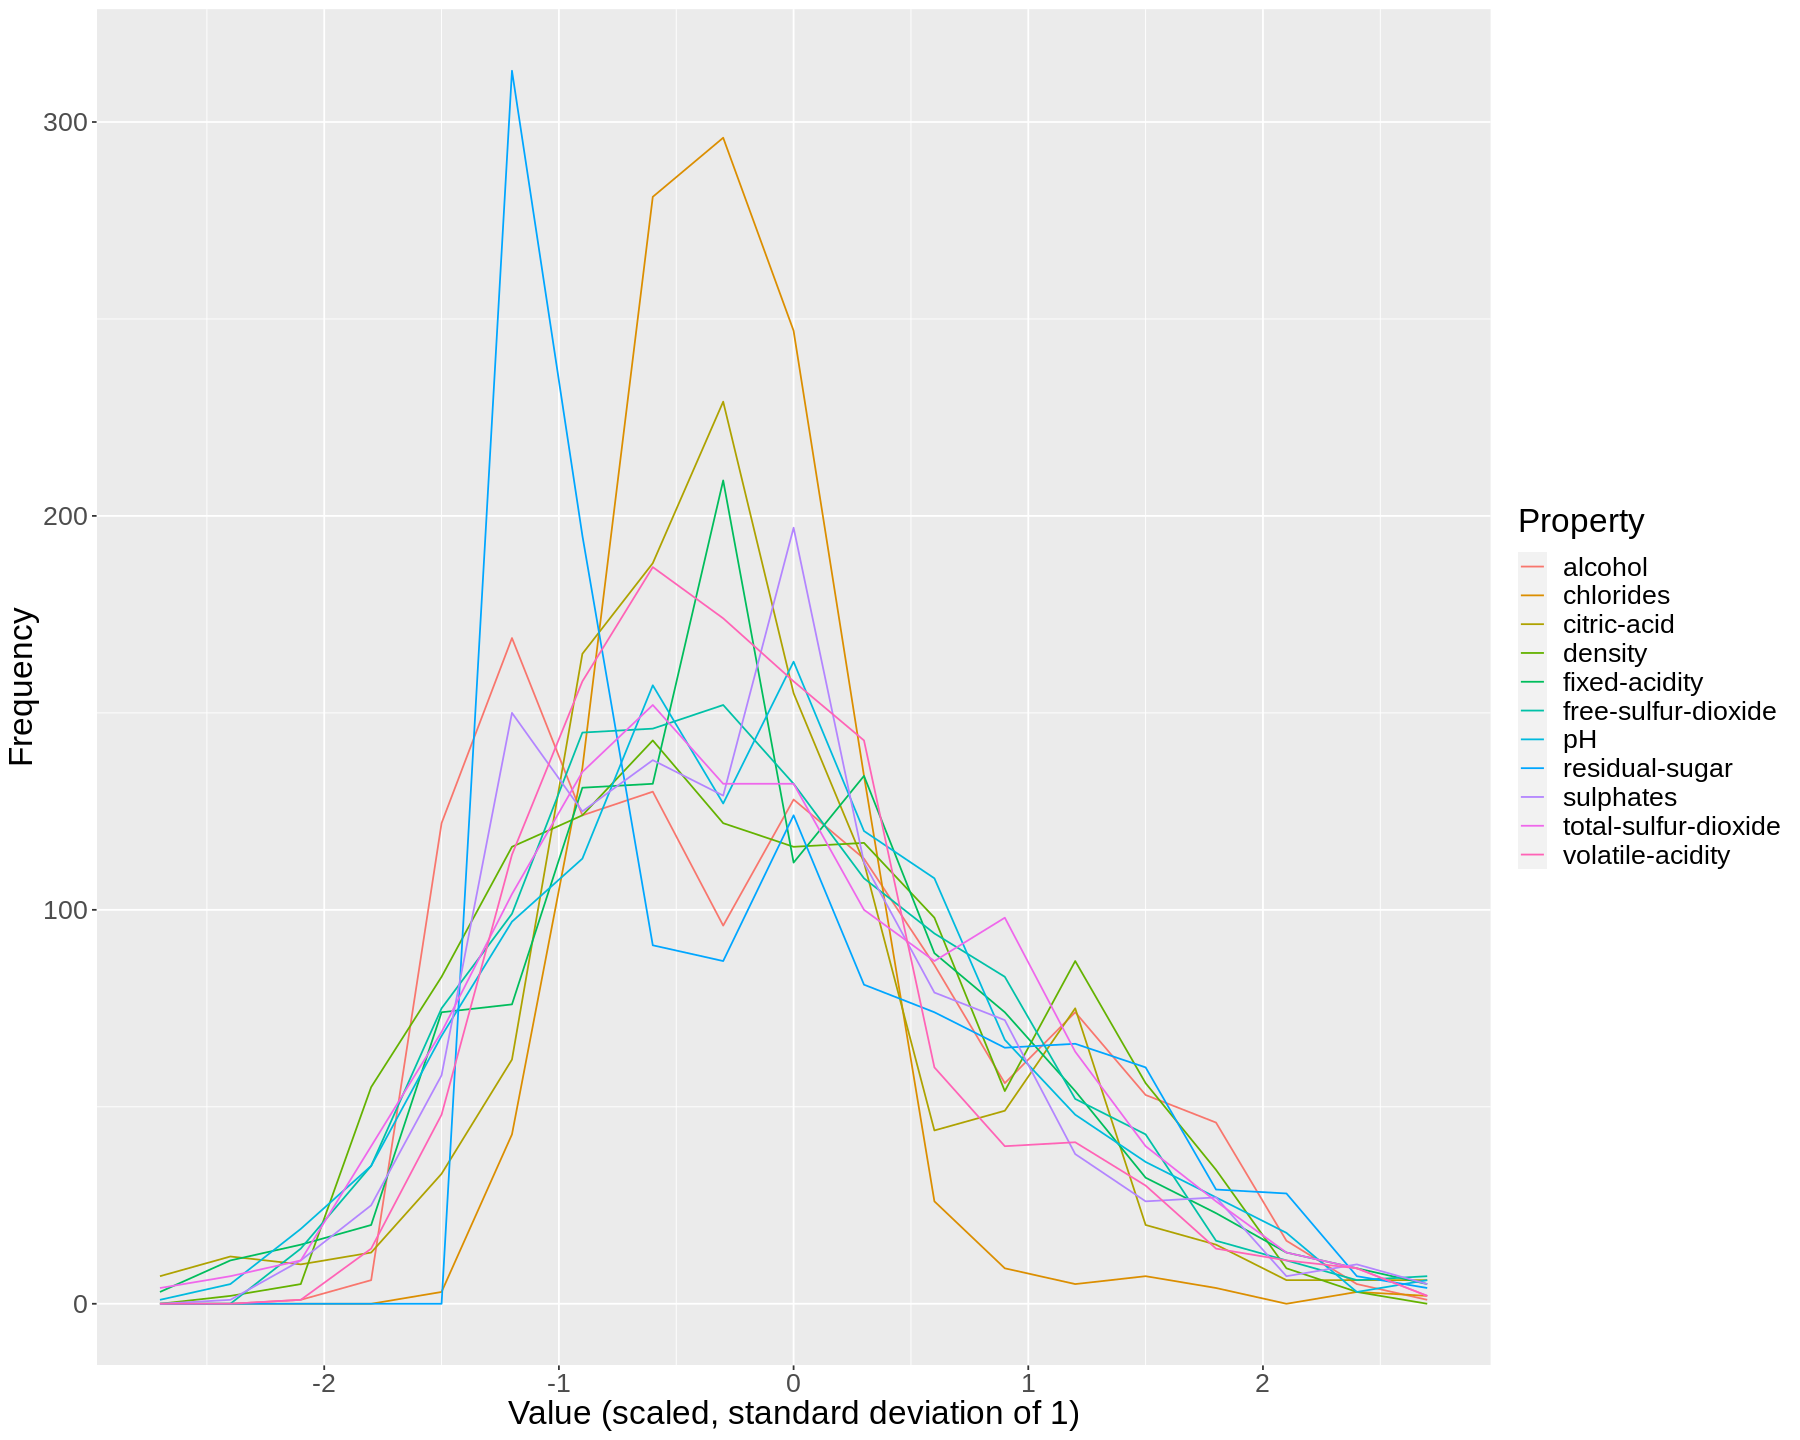

In [29]:
wine_scaled <- select(wine_testing, fixed.acidity:alcohol)
wine_scaled <- scale(wine_scaled)
breaks = seq(-3, 3, by=0.3)
wine_scaled <- as.data.frame(wine_scaled)
x1 <- table(cut(wine_scaled$fixed.acidity, breaks))
x2 <- table(cut(wine_scaled$volatile.acidity, breaks))
x3 <- table(cut(wine_scaled$citric.acid, breaks))
x4 <- table(cut(wine_scaled$residual.sugar, breaks))
x5 <- table(cut(wine_scaled$chlorides, breaks))
x6 <- table(cut(wine_scaled$free.sulfur.dioxide, breaks))
x7 <- table(cut(wine_scaled$total.sulfur.dioxide, breaks))
x8 <- table(cut(wine_scaled$density, breaks))
x9 <- table(cut(wine_scaled$pH, breaks))
x10 <- table(cut(wine_scaled$sulphates, breaks))
x11 <- table(cut(wine_scaled$alcohol, breaks))

wine_frequency <- data.frame(rbind(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
wine_frequency <- data.frame(t(wine_frequency[-1]))
wine_frequency$Value <- c(seq(-2.7, 2.7, by=0.3))

colnames(wine_frequency) <- c(
    "fixed-acidity",
    "volatile-acidity",
    "citric-acid",
    "residual-sugar",
    "chlorides",
    "free-sulfur-dioxide",
    "total-sulfur-dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "Value")

wine_frequency <- pivot_longer(wine_frequency, 
    cols = "fixed-acidity":"alcohol",
    names_to = "Property",
    values_to = "Frequency")

options(repr.plot.width = 15, repr.plot.height = 12)
wine_plot <- ggplot(wine_frequency, aes(x = Value, y = Frequency, colour = Property)) +
    geom_line() +
    xlab("Value (scaled, standard deviation of 1)") +
    theme(text = element_text(size = 20))

wine_plot

## Methods

We will use the K-nearest neighbours classification algorithm to create a model that will predict the quality score, from 3-9, of a sample of white wine.  We will tune our model to determine the value of K that gives the most accurate results, and visualize the tuning process through a line chart. After running our model on the testing dataset, we will compare our predicted values with our actual values using a line chart. From there, with some additional metrics, we can examine the accuracy and estimate if we think over or underfitting of our model may have occurred. We will also examine how well our predictor performs for different classes by looking at a confusion matrix.

## Expected outcomes and significance

We expect to create a model that can predict the quality of a sample of white wine given information on the variables fixed acidity, citric acid, residual sugar, pH, and alcohol. Due to the highly unbalanced dataset (the varying amount of certain classes, specifically fewer data on wines of quality 3 and 9), even with stratification our model will likely be of lower accuracy for wines of these classes.

The impact of this work is that it could make the process of scoring wine quality simpler. It could also reveal what characteristics lead to a higher wine quality score.

Questions that we may ask in this project are how unbalanced datasets affect model performance and how data scientists deal with unbalanced data in the real world. Future modelling questions could involve bringing in human sensory data in addition to these chemical property data. We could ask, how do human sensory data (ex. taste) affect the score? How much does this vary from person to person? Additionally, if data on consumer habits and price were supplied, we could build a more valuable predictor for sales, production, and inventory.